In [41]:
import pandas as pd 
df=pd.read_csv("data.csv")
df.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Y,Male,No,Graduate,No,5849,0.0,0.0,NaN,360.0,1.0,Urban
1,LP001003,N,Male,Yes,Graduate,No,4583,1508.0,1.0,128.0,360.0,1.0,Rural
2,LP001005,Y,Male,Yes,Graduate,Yes,3000,0.0,0.0,66.0,360.0,1.0,Urban
3,LP001006,Y,Male,Yes,Not Graduate,No,2583,2358.0,0.0,120.0,360.0,1.0,Urban
4,LP001008,Y,Male,No,Graduate,No,6000,0.0,0.0,141.0,360.0,1.0,Urban


In [42]:
df.shape

(614, 13)

In [43]:
len(df)

614

In [44]:
df.describe()

,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,600.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,0.761667,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,1.014847,85.587325,65.12041,0.364878
min,150.000000,0.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,0.000000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,2.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,3.000000,700.000000,480.00000,1.000000


In [45]:
df.describe(include=['O'])

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,Property_Area
count,614,614,614,614,614,582,614
unique,614,2,2,2,2,2,3
top,LP001888,Y,Male,Yes,Graduate,No,Semiurban
freq,1,422,502,399,480,500,233


In [46]:
df.isnull().sum()

Loan_ID               0
Loan_Status           0
Gender                0
Married               0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Dependents           14
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
loan_status = LabelEncoder()
df.iloc[:, [1]] = loan_status.fit_transform(df.iloc[:, [1]])

In [48]:
df.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,Male,No,Graduate,No,5849,0.0,0.0,NaN,360.0,1.0,Urban
1,LP001003,0,Male,Yes,Graduate,No,4583,1508.0,1.0,128.0,360.0,1.0,Rural
2,LP001005,1,Male,Yes,Graduate,Yes,3000,0.0,0.0,66.0,360.0,1.0,Urban
3,LP001006,1,Male,Yes,Not Graduate,No,2583,2358.0,0.0,120.0,360.0,1.0,Urban
4,LP001008,1,Male,No,Graduate,No,6000,0.0,0.0,141.0,360.0,1.0,Urban


In [49]:
found_loan_status= df[df['Loan_Status'] == 1]
found_loan_status.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,Male,No,Graduate,No,5849,0.0,0.0,NaN,360.0,1.0,Urban
2,LP001005,1,Male,Yes,Graduate,Yes,3000,0.0,0.0,66.0,360.0,1.0,Urban
3,LP001006,1,Male,Yes,Not Graduate,No,2583,2358.0,0.0,120.0,360.0,1.0,Urban
4,LP001008,1,Male,No,Graduate,No,6000,0.0,0.0,141.0,360.0,1.0,Urban
5,LP001011,1,Male,Yes,Graduate,Yes,5417,4196.0,2.0,267.0,360.0,1.0,Urban


In [50]:
len(found_loan_status)

422

In [51]:
not_found_loan_status= df[df['Loan_Status'] == 0]
not_found_loan_status.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,LP001003,0,Male,Yes,Graduate,No,4583,1508.0,1.0,128.0,360.0,1.0,Rural
7,LP001014,0,Male,Yes,Graduate,No,3036,2504.0,3.0,158.0,360.0,0.0,Semiurban
9,LP001020,0,Male,Yes,Graduate,No,12841,10968.0,1.0,349.0,360.0,1.0,Semiurban
13,LP001029,0,Male,No,Graduate,No,1853,2840.0,0.0,114.0,360.0,1.0,Rural
17,LP001036,0,Female,No,Graduate,No,3510,0.0,0.0,76.0,360.0,0.0,Urban


In [52]:
len(not_found_loan_status)

192

In [53]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 8:12])
df.iloc[:, 8:12] = imputer.transform(df.iloc[:, 8:12])

In [54]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [55]:
df.isnull().sum()

Loan_ID              0
Loan_Status          0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Dependents           0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

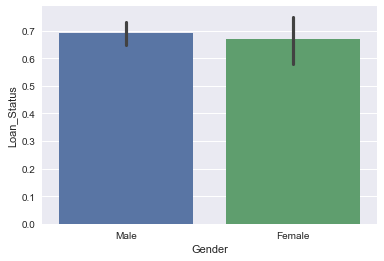

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.barplot(x='Gender', y='Loan_Status', data=df)
sns.set() 


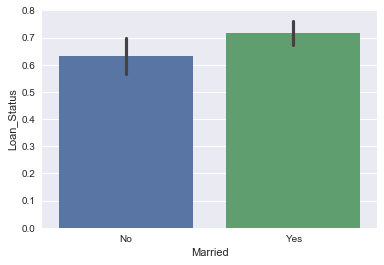

In [57]:
sns.barplot(x='Married', y='Loan_Status', data=df)
sns.set() 


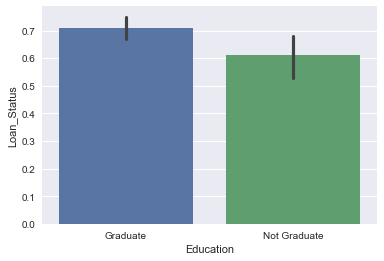

In [58]:
sns.barplot(x='Education', y='Loan_Status', data=df)
sns.set() 


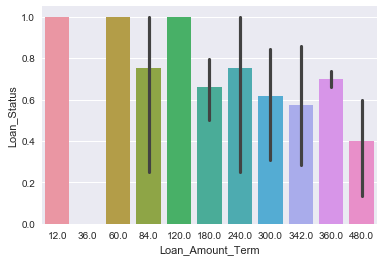

In [59]:
sns.barplot(x='Loan_Amount_Term', y='Loan_Status', data=df)
sns.set() 


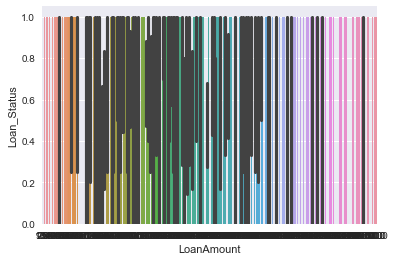

In [60]:
sns.barplot(x='LoanAmount', y='Loan_Status', data=df)
sns.set() 


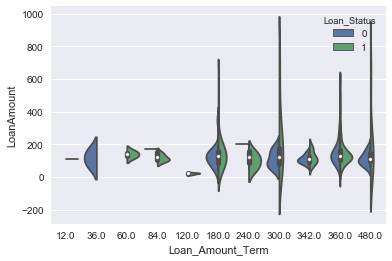

In [61]:
sns.violinplot(x='Loan_Amount_Term', y='LoanAmount', hue='Loan_Status', data=df, split=True)
sns.set()


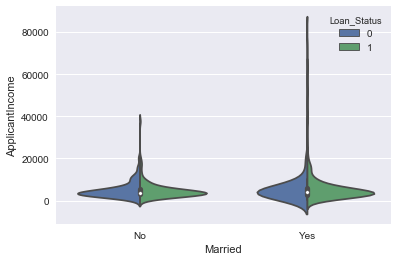

In [62]:
sns.violinplot(x = 'Married', y = 'ApplicantIncome', hue = 'Loan_Status', data = df, split = True)
sns.set()

In [63]:
df.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,Male,No,Graduate,No,5849,0.0,0.0,146.412162,360.0,1.0,Urban
1,LP001003,0,Male,Yes,Graduate,No,4583,1508.0,1.0,128.000000,360.0,1.0,Rural
2,LP001005,1,Male,Yes,Graduate,Yes,3000,0.0,0.0,66.000000,360.0,1.0,Urban
3,LP001006,1,Male,Yes,Not Graduate,No,2583,2358.0,0.0,120.000000,360.0,1.0,Urban
4,LP001008,1,Male,No,Graduate,No,6000,0.0,0.0,141.000000,360.0,1.0,Urban


In [64]:
df.isnull().sum()

Loan_ID              0
Loan_Status          0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Dependents           0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df.iloc[:, 12] = labelencoder.fit_transform(df.iloc[:, 12])
df.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,Male,No,Graduate,No,5849,0.0,0.0,146.412162,360.0,1.0,2
1,LP001003,0,Male,Yes,Graduate,No,4583,1508.0,1.0,128.000000,360.0,1.0,0
2,LP001005,1,Male,Yes,Graduate,Yes,3000,0.0,0.0,66.000000,360.0,1.0,2
3,LP001006,1,Male,Yes,Not Graduate,No,2583,2358.0,0.0,120.000000,360.0,1.0,2
4,LP001008,1,Male,No,Graduate,No,6000,0.0,0.0,141.000000,360.0,1.0,2


In [66]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df.iloc[:, 2] = labelencoder.fit_transform(df.iloc[:, 2])
df.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,1,No,Graduate,No,5849,0.0,0.0,146.412162,360.0,1.0,2
1,LP001003,0,1,Yes,Graduate,No,4583,1508.0,1.0,128.000000,360.0,1.0,0
2,LP001005,1,1,Yes,Graduate,Yes,3000,0.0,0.0,66.000000,360.0,1.0,2
3,LP001006,1,1,Yes,Not Graduate,No,2583,2358.0,0.0,120.000000,360.0,1.0,2
4,LP001008,1,1,No,Graduate,No,6000,0.0,0.0,141.000000,360.0,1.0,2


In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df.iloc[:, 3] = labelencoder.fit_transform(df.iloc[:, 3])
df.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,1,0,Graduate,No,5849,0.0,0.0,146.412162,360.0,1.0,2
1,LP001003,0,1,1,Graduate,No,4583,1508.0,1.0,128.000000,360.0,1.0,0
2,LP001005,1,1,1,Graduate,Yes,3000,0.0,0.0,66.000000,360.0,1.0,2
3,LP001006,1,1,1,Not Graduate,No,2583,2358.0,0.0,120.000000,360.0,1.0,2
4,LP001008,1,1,0,Graduate,No,6000,0.0,0.0,141.000000,360.0,1.0,2


In [68]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df.iloc[:, 4] = labelencoder.fit_transform(df.iloc[:, 4])
df.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,1,0,0,No,5849,0.0,0.0,146.412162,360.0,1.0,2
1,LP001003,0,1,1,0,No,4583,1508.0,1.0,128.000000,360.0,1.0,0
2,LP001005,1,1,1,0,Yes,3000,0.0,0.0,66.000000,360.0,1.0,2
3,LP001006,1,1,1,1,No,2583,2358.0,0.0,120.000000,360.0,1.0,2
4,LP001008,1,1,0,0,No,6000,0.0,0.0,141.000000,360.0,1.0,2


In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df.iloc[:, 5] = labelencoder.fit_transform(df.iloc[:, 5])
df.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,1,0,0,0,5849,0.0,0.0,146.412162,360.0,1.0,2
1,LP001003,0,1,1,0,0,4583,1508.0,1.0,128.000000,360.0,1.0,0
2,LP001005,1,1,1,0,1,3000,0.0,0.0,66.000000,360.0,1.0,2
3,LP001006,1,1,1,1,0,2583,2358.0,0.0,120.000000,360.0,1.0,2
4,LP001008,1,1,0,0,0,6000,0.0,0.0,141.000000,360.0,1.0,2


In [70]:
df = pd.get_dummies(df, columns=['Property_Area'])
df.head()

,Loan_ID,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_0,Property_Area_1,Property_Area_2
0,LP001002,1,1,0,0,0,5849,0.0,0.0,146.412162,360.0,1.0,0,0,1
1,LP001003,0,1,1,0,0,4583,1508.0,1.0,128.000000,360.0,1.0,1,0,0
2,LP001005,1,1,1,0,1,3000,0.0,0.0,66.000000,360.0,1.0,0,0,1
3,LP001006,1,1,1,1,0,2583,2358.0,0.0,120.000000,360.0,1.0,0,0,1
4,LP001008,1,1,0,0,0,6000,0.0,0.0,141.000000,360.0,1.0,0,0,1


In [75]:
col = ['Loan_ID']
df = df.drop(col, axis=1)
print df.head()

   Loan_Status  Gender  Married  Education  Self_Employed  ApplicantIncome  \
0            1       1        0          0              0             5849   
1            0       1        1          0              0             4583   
2            1       1        1          0              1             3000   
3            1       1        1          1              0             2583   
4            1       1        0          0              0             6000   

   CoapplicantIncome  Dependents  LoanAmount  Loan_Amount_Term  \
0                0.0         0.0  146.412162             360.0   
1             1508.0         1.0  128.000000             360.0   
2                0.0         0.0   66.000000             360.0   
3             2358.0         0.0  120.000000             360.0   
4                0.0         0.0  141.000000             360.0   

   Credit_History  Property_Area_0  Property_Area_1  Property_Area_2  
0             1.0                0                0            

In [76]:
df.to_csv('newdata.csv', index=False)
df=pd.read_csv("newdata.csv")
df.head()


,Loan_Status,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_0,Property_Area_1,Property_Area_2
0,1,1,0,0,0,5849,0.0,0.0,146.412162,360.0,1.0,0,0,1
1,0,1,1,0,0,4583,1508.0,1.0,128.000000,360.0,1.0,1,0,0
2,1,1,1,0,1,3000,0.0,0.0,66.000000,360.0,1.0,0,0,1
3,1,1,1,1,0,2583,2358.0,0.0,120.000000,360.0,1.0,0,0,1
4,1,1,0,0,0,6000,0.0,0.0,141.000000,360.0,1.0,0,0,1


In [77]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0:1].values
print X.shape, Y.shape

(614L, 13L) (614L, 1L)


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)
print X_train.shape, Y_train.shape
print X_test.shape, Y_test.shape

(411L, 13L) (411L, 1L)
(203L, 13L) (203L, 1L)


In [80]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train.ravel())
Y_pred_knn = clf.predict(X_test)
acc_knn = round(accuracy_score(Y_pred_knn, Y_test) * 100, 2)
print (str(acc_knn) + ' percent')

60.1 percent


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, Y_train.ravel())
Y_pred = clf.predict(X_test)
acc_log_reg = round( accuracy_score(Y_pred, Y_test) * 100, 2)
print (str(acc_log_reg) + ' percent')

82.76 percent


In [82]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.08)#REGULARISATION PARAMETER
clf.fit(X_train, Y_train.ravel())
Y_pred_logr = clf.predict(X_test)
acc_log_reg = round( accuracy_score(Y_pred_logr, Y_test) * 100, 2)
print (str(acc_log_reg) + ' percent')

82.27 percent


In [83]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train.ravel())
Y_pred_gnb = clf.predict(X_test)
acc_gnb = round(accuracy_score(Y_pred_gnb, Y_test) * 100, 2)
print (str(acc_gnb) + ' percent')

81.28 percent


In [84]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(accuracy_score(y_pred_decision_tree, Y_test) * 100, 2)
print (str(acc_decision_tree) + ' percent')

75.86 percent


In [85]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train.ravel())
Y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(accuracy_score(Y_pred_random_forest, Y_test) * 100, 2)
print (str(acc_random_forest) + ' percent')

81.28 percent


In [86]:
models = pd.DataFrame({
    'Algorithm_names': ['Logistic_Regression', 'KNN', 'Gaussion_NB', 'Decision_Tree', 'Random_Forest'],
    
    'Accuracy_score': [acc_log_reg, acc_knn,  acc_gnb, acc_decision_tree,  acc_random_forest]
    })

models.sort_values(by='Accuracy_score', ascending=False)

,Accuracy_score,Algorithm_names
0,82.27,Logistic_Regression
2,81.28,Gaussion_NB
4,81.28,Random_Forest
3,75.86,Decision_Tree
1,60.10,KNN


In [87]:
models.shape

(5, 2)

<function seaborn.rcmod.set>

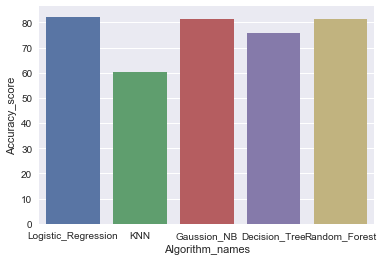

In [88]:
sns.barplot(x="Algorithm_names", y="Accuracy_score", data=models)
sns.set